In [1]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img 
import numpy as np
from tqdm import tqdm
import pandas as pd

In [2]:
# Get file paths for images
images = glob.glob('images' + '/**/*.png', recursive=True)

In [3]:
## Remove backgrund transparency
for image in tqdm(images):
    png = Image.open(image).convert('RGBA')
    background = Image.new('RGBA', png.size, (255,255,255))

    alpha_composite = Image.alpha_composite(background, png)
    alpha_composite.save(image, 'png', quality=95)

100%|████████████████████████████████████████████████████████████████████████████████| 830/830 [05:20<00:00,  2.59it/s]


In [4]:
## crop images to its minimum boundary size
def bbox(im):
    a = np.array(im)[:,:,:3]  # keep RGB only
    m = np.any(a != [255, 255, 255], axis=2)
    coords = np.argwhere(m)
    y0, x0, y1, x1 = *np.min(coords, axis=0), *np.max(coords, axis=0)
    return (x0, y0, x1+1, y1+1)

for image in tqdm(images):
    im = Image.open(image)
    im2 = im.crop(bbox(im))
    im2.save(image, quality=95)

100%|████████████████████████████████████████████████████████████████████████████████| 830/830 [05:48<00:00,  2.38it/s]


In [34]:
## Add paddings to the image to resize to proportional dimensions
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

wingspan = pd.read_csv("wingspan.csv")

for image in tqdm(images):
    if 'Caligo placidianus' in image:
        continue
    for index, row in wingspan.iterrows():
        if row['name'] in image:
            length = row['length']
            total_padding = (14.36-length)
            padding = total_padding/2
            im = Image.open(image)
            width = im.size[0]
            add_pixels = round(padding*(width/length))
            im_new = add_margin(im, add_pixels, add_pixels, add_pixels, add_pixels, (255, 255, 255))
            im_new.save(image, quality=95)

100%|████████████████████████████████████████████████████████████████████████████████| 830/830 [08:29<00:00,  1.63it/s]


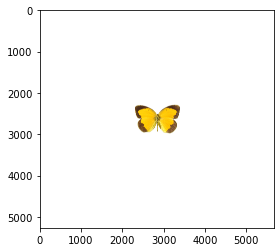

In [21]:
img = load_img('test2.png')
plt.imshow(img)

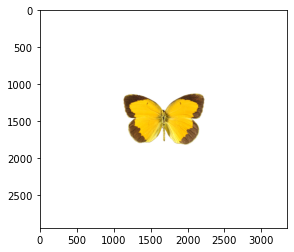

In [36]:
img = load_img('images\\Tan_batch_1_to_Acraea_Tancrop\\Abaeis nicippe\\Abaeis nicippe IMG_076290.png')
plt.imshow(img)